# Quantum Phase Estimation


In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
def makeCirc(n, state):
    initState = state
    print('Init state = ',initState)
    qr = QuantumRegister(n,"q")
    qc = ClassicalRegister(n, "c")
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [6]:
def getHistogram(n, circ):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qboj = assemble(circ, shots=shots)
    results = qasm_sim.run(qboj).result()
    counts = results.get_counts()
    return counts

## QPE

In [7]:
def quantumPhaseEstimator(n, angle):
    circ = QuantumCircuit(n, n-1)
    circ.x(n-1)
    circ.h(range(0, n-1))
    angle = pi*angle
    
    # Controlled Phase gates
    for i in range(0, n-1):
        for j in range(2**i):
            circ.cp(angle, i, n-1)
    
    # Inverse QFT
    circ.barrier()
    for i in range(0, n//2):
        circ.swap(i, n-i-1)
    for i in range(n):
        for j in range(i):
            circ.cp(-pi/float(2**(i-j)), i, j)
        circ.h(i)
    circ.barrier()
    
    # Measurement
    circ.measure(range(0, n-1), range(0, n-1))
    return circ

In [20]:
circ = quantumPhaseEstimator(4, 5.5/8)

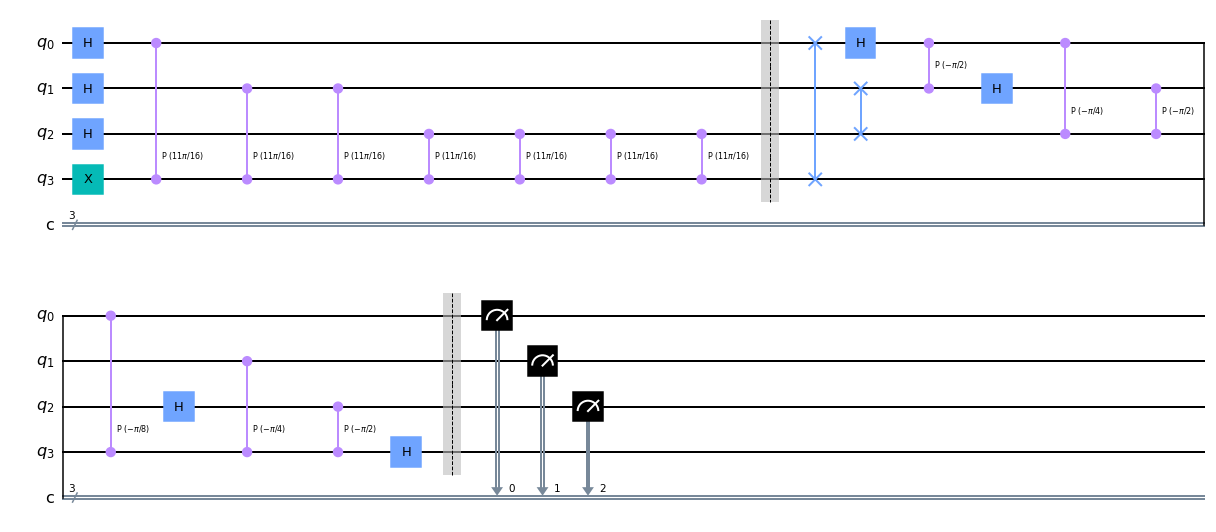

In [21]:
circ.draw();

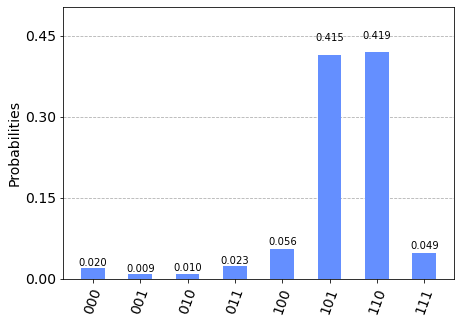

In [22]:
plot_histogram(getHistogram(1024, circ));

In [ ]:
# Since we use 4 qubits -> 3 qubits are going to be measured
# 2^3k = n
# Example: 001 = n = 1 -> k = 1/8
# Example: 101 = n = 5 -> k = 5/8
# Example: 011 = n = 3 -> k = 3/8
# Example: 101 and 110 -> Average(101, 110) = (5+6)/2 = 5.5 = n -> k = 5.5/8